In [1]:
# 1.Importing Required libraries

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preparing data
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# models for regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#models for Classification
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

#Evaluation metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [2]:
# 2. Importing dataset Online News popularity (originally from UCI machine learining reporitory)

dataset = pd.read_csv('/Users/apple/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [3]:
# 3. Basic Analysis of dataset

# 3.1 order of pandas dataframe: Around 40k instances , 60 (independent variables) and 1 ( target variable)

dataset.shape

(39644, 61)

In [4]:
# 3.2 first few instances of dataset

dataset.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
# 3.3 Types of data in the dataframe

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [6]:
#3.4 Distribution of data

dataset.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
#3.5 Checking for missing values in data instances:

dataset.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

<function matplotlib.pyplot.show(*args, **kw)>

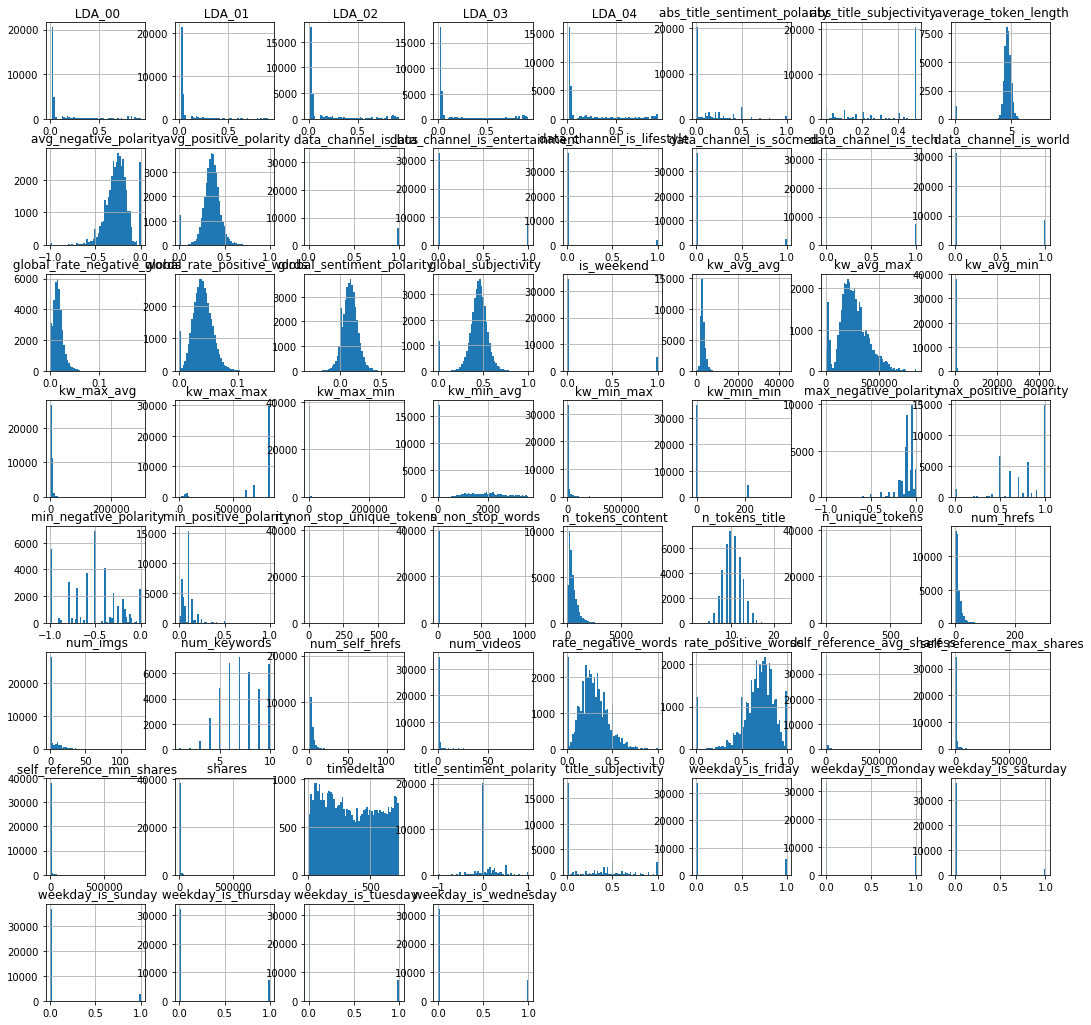

In [8]:
# 4. EDA 

#4.1 Histogram plot of data

dataset.hist(bins=55, figsize= (18,18))
plt.show

#lot of categorical variables in the dataset

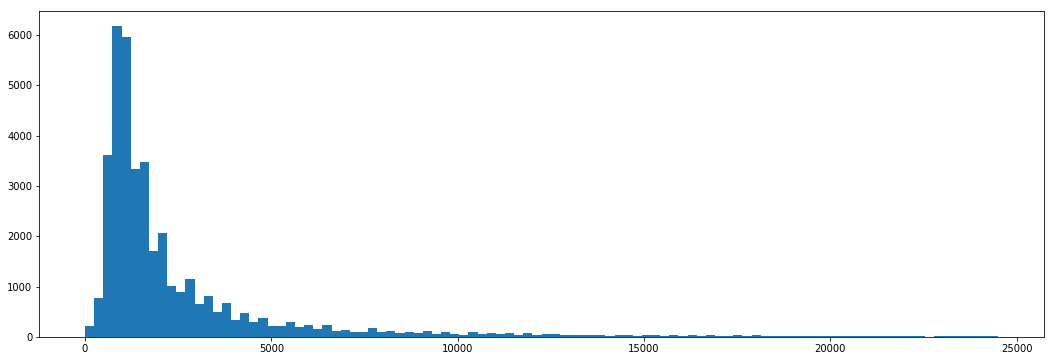

(39053, 1)

In [9]:
# 4.2 Fixing Outliers 

# Outlier : we define outlier as values which are two standard deviations away from the mean.

def reject_outliers(shares):
    m = np.median(dataset[' shares'])
    sd = np.std(dataset[' shares'])
    filtered= [a for a in (dataset[' shares']) if (m - 2 * sd < a < m + 2 * sd)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =18.0
fig_size[1] = 6.0
#plt.rcParams["figure.figsize"] = fig_size

filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=17.0
fig_size[1]=9.0
plt.show()

dataset_shares = pd.DataFrame(filtered)
dataset_shares.shape

In [10]:
# 4.3 New dataset without outliers in column shares

#Outlier for shares column would be : mean + 2 * sd = 3395 + (2 x 11627) = 26649 above

df = dataset[dataset[' shares']<26649]

In [11]:
#4.4New order of pandas dataframe after removing outliers

df.shape

(39130, 61)

In [12]:
#4.5 Correlation of variables with target variable:

cmat = df.corr()
cmat[' shares'].sort_values(ascending=False)

#Nothing has correlation greater than 0.5 with target variable

 shares                           1.000000
 kw_avg_avg                       0.184027
 LDA_03                           0.122997
 kw_max_avg                       0.096294
 kw_min_avg                       0.081258
 num_hrefs                        0.076651
 num_imgs                         0.073403
 self_reference_avg_sharess       0.067889
 is_weekend                       0.067792
 self_reference_min_shares        0.060230
 self_reference_max_shares        0.055830
 kw_avg_max                       0.052563
 global_subjectivity              0.052508
 abs_title_sentiment_polarity     0.052128
 weekday_is_sunday                0.049506
 title_subjectivity               0.048917
 data_channel_is_socmed           0.047302
 num_keywords                     0.044302
 weekday_is_saturday              0.042820
 title_sentiment_polarity         0.037470
 num_videos                       0.036995
 kw_avg_min                       0.036717
 kw_max_min                       0.033022
 data_chann

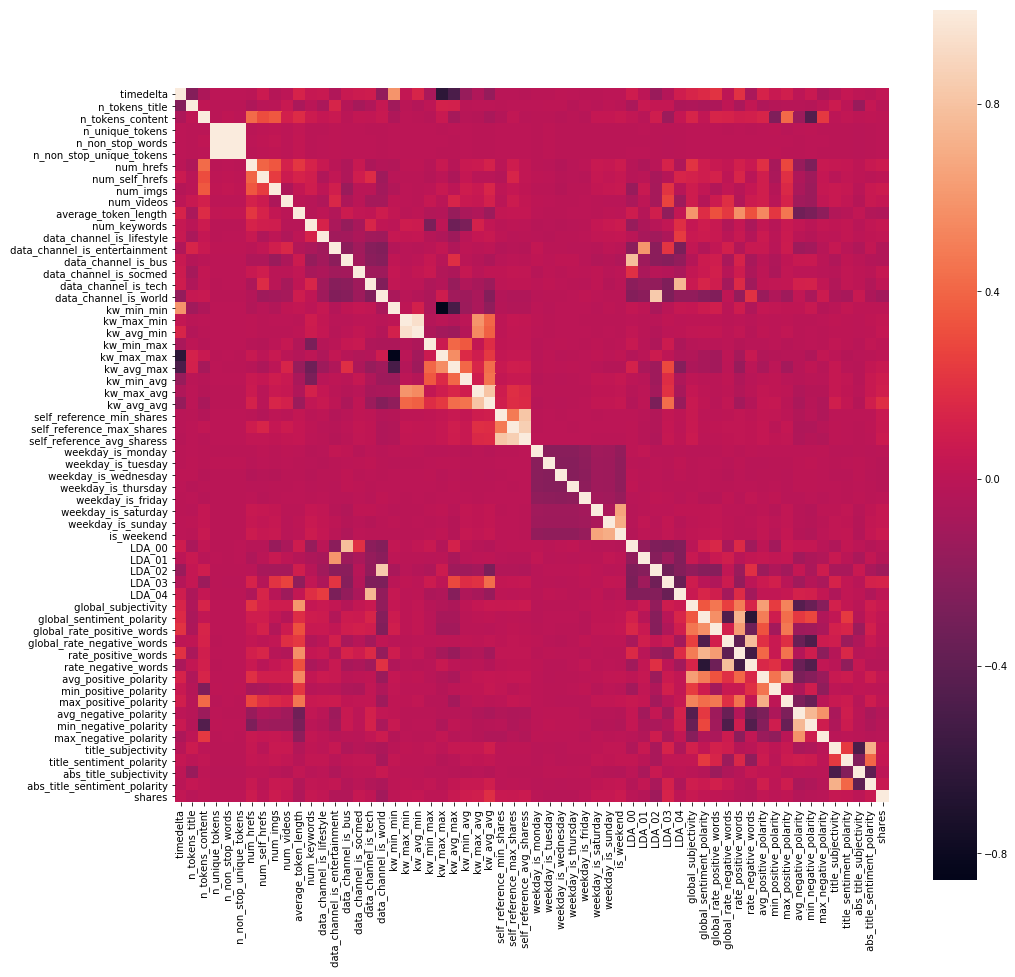

In [46]:
#4.6 Correlation Matrix:


f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(cmat, vmax=1, square=True);
plt.show()

In [13]:
#dropping url from dataframe
df = df.drop("url",axis =1)

In [14]:
#dropping timedelta from dataframe
df = df.drop(" timedelta",axis=1)

In [15]:
df.shape

(39130, 59)

In [16]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [17]:
# 5. Train and test

#Setting up feature matrix
X=df.iloc[:,0:58].values

In [18]:
# setting up target vector
y = df.iloc[:,58].values

In [19]:
# 25 percent of the data is allocated for testing
# random state is set not to introduce sampling bias

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Mean Absolute Error: 2023.9479516865408
Mean Squared Error: 137427335.56977454
Root Mean Squared Error: 11722.94056838021
variance: -10.701481630361501
    Actual    Predicted
0     2300  2045.797769
1     1900  2803.885057
2    14100  3529.280307
3     1600  1918.932021
4      956  2552.916692
5     3600  2399.120458
6      697  1421.213975
7     1100  4517.830195
8     2200  2281.614360
9     8300  2876.966087
10    1700  2842.822791
11     533  1901.862870
12    1700  1931.360015
13     688  1999.767925
14    1500  2551.727738
15   16300  2491.847357
16     396  1451.633069
17     372  2529.980840
18    3200  3462.202385
19    1900  2704.386795


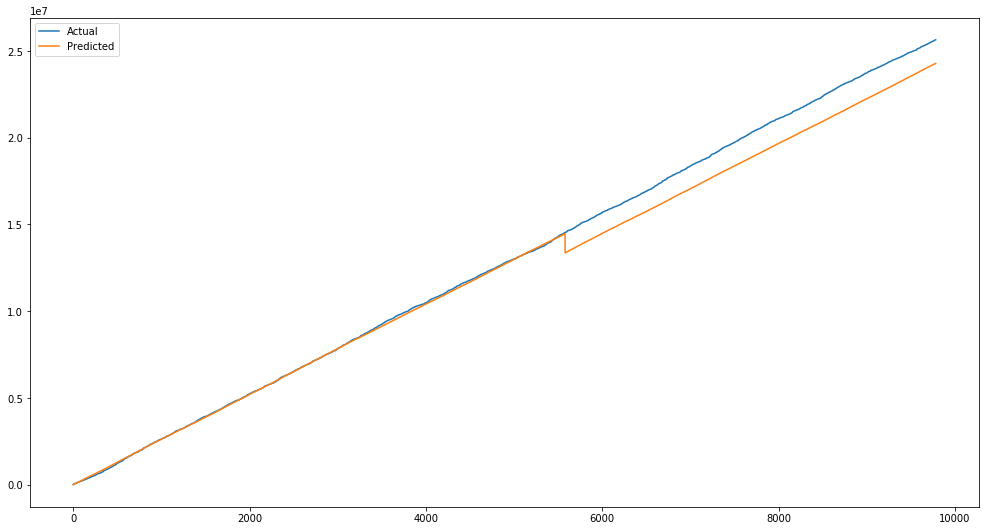

In [25]:
# 6. Models for Regression

# 6.1 Linear Regression
linreg = LinearRegression()

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('variance:',metrics.r2_score(y_test, y_pred))
a1 = y_test.ravel()
b1 = y_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mean Absolute Error: 1687.3415760220378
Mean Squared Error: 13234472.159546262
Root Mean Squared Error: 3637.921406455376
variance: -0.1268713914913555
    Actual   Predicted
0     2300  1400.54498
1     1900  1400.54498
2    14100  1400.54498
3     1600  1400.54498
4      956  1400.54498
5     3600  1400.54498
6      697  1400.54498
7     1100  1400.54498
8     2200  1400.54498
9     8300  1400.54498
10    1700  1400.54498
11     533  1400.54498
12    1700  1400.54498
13     688  1400.54498
14    1500  1400.54498
15   16300  1400.54498
16     396  1400.54498
17     372  1400.54498
18    3200  1400.54498
19    1900  1400.54498


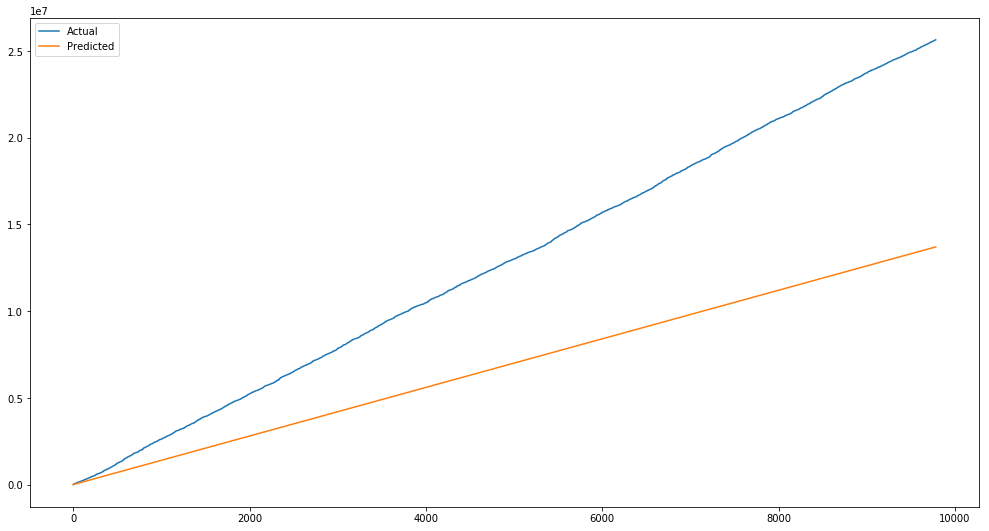

In [26]:
# 6.2 SVM Regressor

svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train, y_train)
svr_pred= svr_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print ('variance:',metrics.r2_score(y_test, svr_pred))
a1 = y_test.ravel()
b1 = svr_pred.ravel()  

dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

Mean Absolute Error: 2636.171215373607
Mean Squared Error: 23047916.271389145
Root Mean Squared Error: 4800.824540783505
variance: -0.9624535959284515
    Actual  Predicted
0     2300      767.0
1     1900     2800.0
2    14100     1800.0
3     1600      548.0
4      956      714.0
5     3600     1200.0
6      697     2200.0
7     1100     2900.0
8     2200     5200.0
9     8300     5700.0
10    1700     5400.0
11     533     1500.0
12    1700     1300.0
13     688     2300.0
14    1500     1700.0
15   16300     1800.0
16     396     2100.0
17     372     5000.0
18    3200     1900.0
19    1900     3000.0


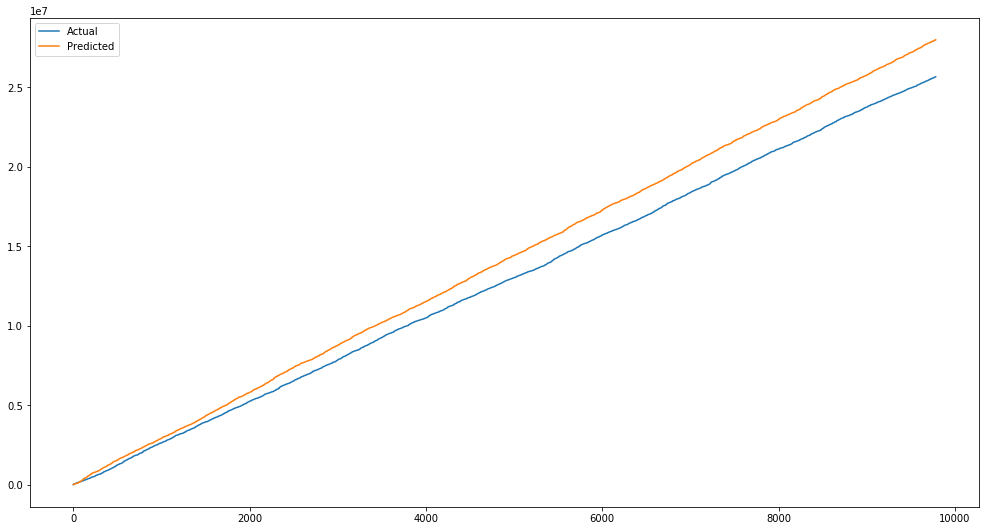

In [27]:
#6.3 Decision Tree Regressor

dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train,y_train)
dt_pred= dt_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,dt_pred))) 
print ('variance:',metrics.r2_score(y_test, dt_pred))
a3 = y_test
b3 = dt_pred 
dataf = pd.DataFrame({'Actual': a3, 'Predicted': b3})   
print(dataf.head(20))
dataf = dataf.cumsum();
dataf.plot();

In [68]:
#6.4 KNN Regressor
a = [1,2,3,4,5,6,7,8,9,10]
score= []
for i in a:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    k_pred= knn.predict(X_test)
    a= metrics.mean_absolute_error(k_pred,y_test)
    score.append(a)
print(score)


[2480.8743739139322, 2276.669426556271, 2177.8180857950865, 2127.669963201472, 2084.9999795563735, 2058.6363249173737, 2032.9800236561966, 2016.3822574874782, 2011.4048519540702, 2002.2131861392213]


Mean Absolute Error: 1977.5447712253779
Mean Squared Error: 55493955.28912896
Root Mean Squared Error: 7449.426507398335
variance: -3.7251261600873535
    Actual  Predicted
0     2300     1588.6
1     1900     1804.0
2    14100     2035.0
3     1600     1842.7
4      956     2569.9
5     3600     4528.1
6      697     1288.7
7     1100     2882.8
8     2200     3330.3
9     8300     1739.5
10    1700     2693.5
11     533     2312.0
12    1700     1650.3
13     688     1030.6
14    1500     2847.9
15   16300     2176.5
16     396     1014.8
17     372     2266.7
18    3200     5579.5
19    1900     3010.8


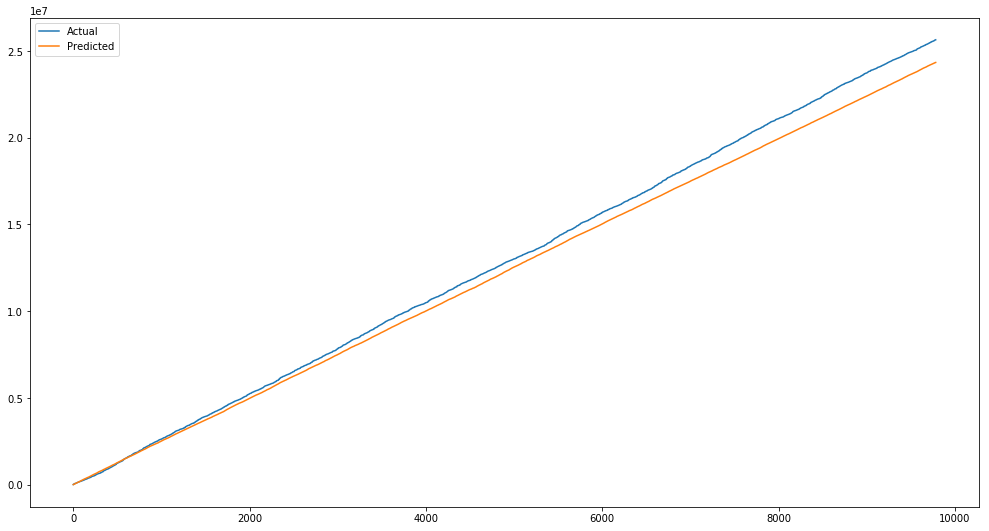

In [33]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
k_pred= knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rdg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rdg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rdg_pred))) 
print ('variance:',metrics.r2_score(y_test, rdg_pred))
a1 = y_test.ravel()
b1 = k_pred.ravel()  

dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

k = 10 gives best score

MAE is  2023.2187284064194
variance: 0.039595310860386146
Root Mean Squared Error: 7449.426507398335
Mean Squared Error: 55493955.28912896
    Actual  Predicted
0     2300    1762.97
1     1900    2066.34
2    14100    3266.24
3     1600    1688.55
4      956    2111.36
5     3600    3203.55
6      697    1403.34
7     1100    3317.25
8     2200    1447.88
9     8300    5967.61
10    1700    5348.56
11     533    1061.98
12    1700    1549.30
13     688    1895.84
14    1500    2841.12
15   16300    3194.72
16     396    1648.96
17     372    2360.33
18    3200    3012.81
19    1900    2461.87


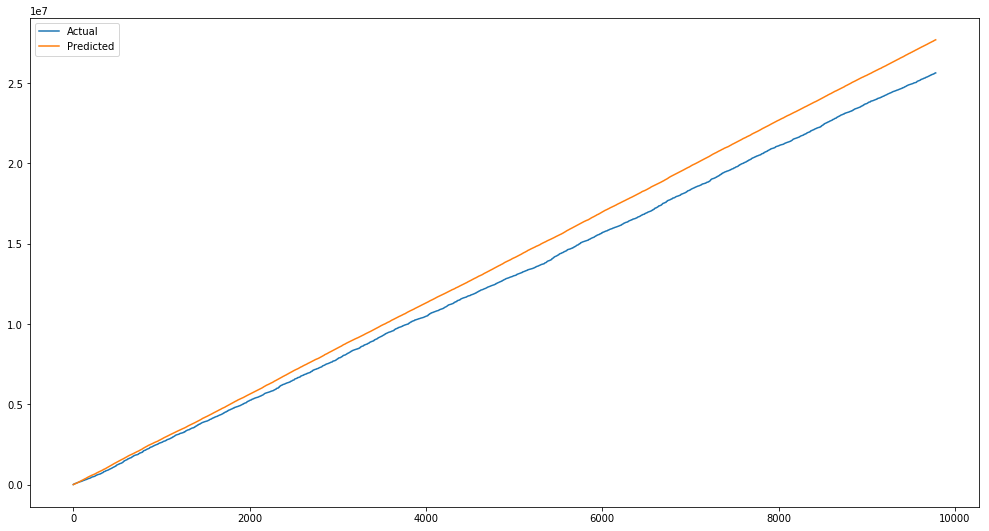

In [35]:
#6.5 Random Forest Regressor

regr = RandomForestRegressor(random_state=0,n_estimators=100)
regr.fit(X_train,y_train)
rf_pred= regr.predict(X_test)
print('MAE is ' , metrics.mean_absolute_error(rf_pred,y_test))
print ('variance:',metrics.r2_score(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rdg_pred))) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rdg_pred))
a1 = y_test.ravel()
b1 = rf_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

Mean Absolute Error: 1977.5447712253779
Mean Squared Error: 55493955.28912896
Root Mean Squared Error: 7449.426507398335
variance: -3.7251261600873535
    Actual    Predicted
0     2300  2040.709592
1     1900  2799.341633
2    14100  3523.188473
3     1600  1913.958416
4      956  2556.322303
5     3600  2395.086155
6      697  1423.170768
7     1100  4515.052326
8     2200  2266.249697
9     8300  2886.372555
10    1700  2846.935534
11     533  1903.308136
12    1700  1937.656314
13     688  2000.220462
14    1500  2554.335340
15   16300  2482.897706
16     396  1450.521970
17     372  2538.674518
18    3200  3460.517325
19    1900  2699.562053


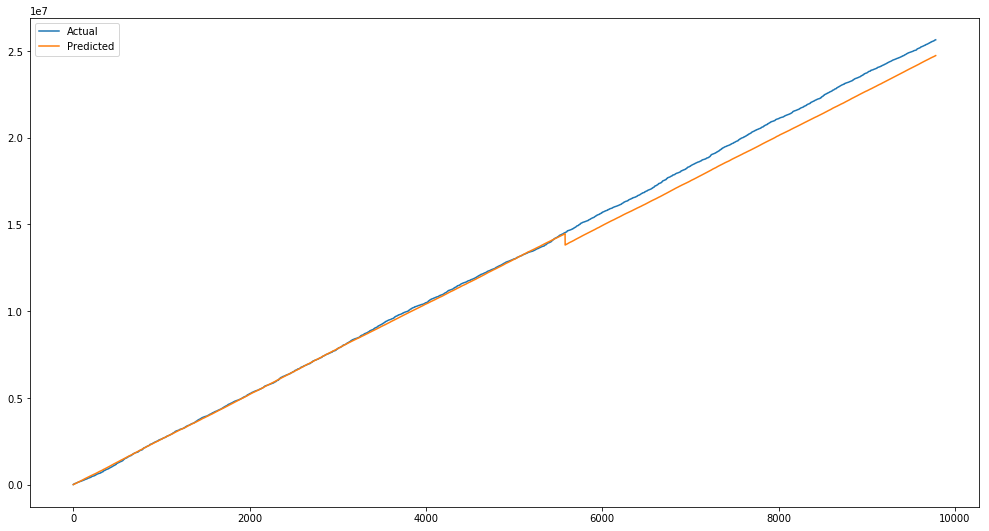

In [29]:
#6.6 Ridge Regressor

ridge = Ridge()
ridge.fit(X_train,y_train)

rdg_pred = ridge.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rdg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rdg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rdg_pred))) 
print ('variance:',metrics.r2_score(y_test, rdg_pred))
a1 = y_test.ravel()
b1 = rf_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

Mean Absolute Error: 1946.4803482978975
Mean Squared Error: 11135462.912813008
Root Mean Squared Error: 3336.9841043692445
variance: 0.05185228121011909
    Actual    Predicted
0     2300  2539.238651
1     1900  2083.156955
2    14100  2627.094865
3     1600  2062.419926
4      956  2676.507850
5     3600  2547.008669
6      697  2053.374801
7     1100  3635.539874
8     2200  2070.312146
9     8300  3187.072297
10    1700  2750.427461
11     533  2094.460896
12    1700  1996.192028
13     688  2486.517884
14    1500  2511.889717
15   16300  3154.677642
16     396  1545.027981
17     372  2358.546038
18    3200  3843.731031
19    1900  2755.396140


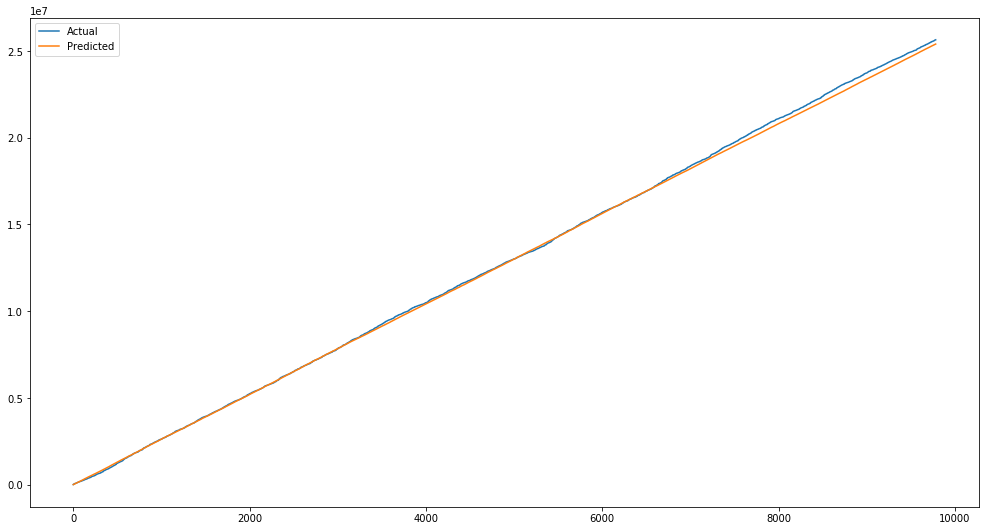

In [30]:
# 6.7 Bayesian Regressor

br = BayesianRidge()
br.fit(X_train,y_train)
br_pred = br.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, br_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, br_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, br_pred))) 
print ('variance:',metrics.r2_score(y_test, br_pred))
a1 = y_test.ravel()
b1 = rf_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

Mean Absolute Error: 1910.3215157606303
Mean Squared Error: 10998715.658830704
Root Mean Squared Error: 3316.4311629869094
variance: 0.06349585614986519
    Actual    Predicted
0     2300  2019.492333
1     1900  2770.666743
2    14100  3465.158393
3     1600  1920.215196
4      956  2581.126947
5     3600  2394.209035
6      697  1434.668741
7     1100  4547.488528
8     2200  2179.896555
9     8300  2913.444461
10    1700  2907.506663
11     533  1913.617409
12    1700  1975.666165
13     688  2024.633702
14    1500  2568.370156
15   16300  2456.813290
16     396  1418.829216
17     372  2614.616392
18    3200  3423.392560
19    1900  2680.911354


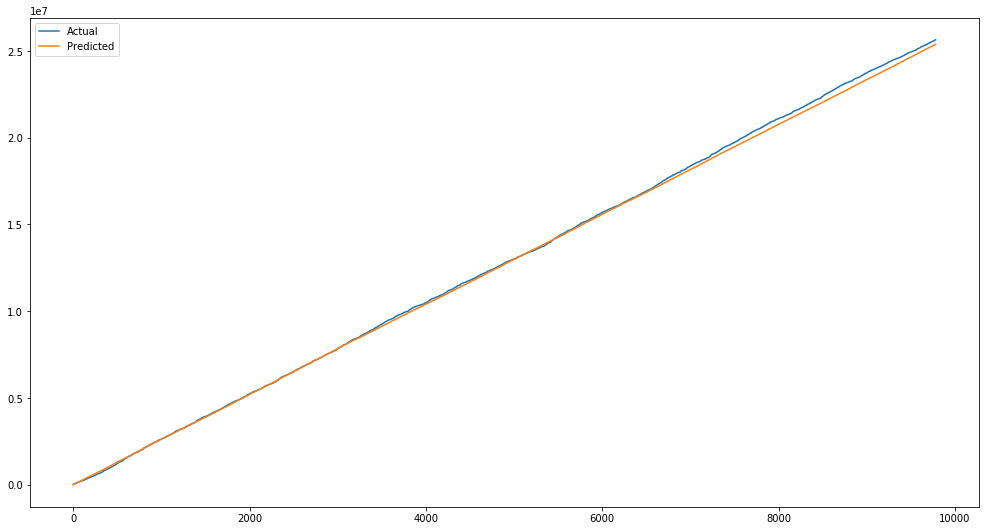

In [36]:
# 6.8 Lasso Regressor
lasso = Lasso()
lasso.fit(X_train,y_train)
las_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, las_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, las_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, las_pred))) 
print ('variance:',metrics.r2_score(y_test, las_pred))
a1 = y_test.ravel()
b1 = rf_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

Mean Absolute Error: 1910.3215157606303
Mean Squared Error: 10998715.658830704
Root Mean Squared Error: 3316.4311629869094
variance: 0.06349585614986519
    Actual    Predicted
0     2300  2019.492333
1     1900  2770.666743
2    14100  3465.158393
3     1600  1920.215196
4      956  2581.126947
5     3600  2394.209035
6      697  1434.668741
7     1100  4547.488528
8     2200  2179.896555
9     8300  2913.444461
10    1700  2907.506663
11     533  1913.617409
12    1700  1975.666165
13     688  2024.633702
14    1500  2568.370156
15   16300  2456.813290
16     396  1418.829216
17     372  2614.616392
18    3200  3423.392560
19    1900  2680.911354


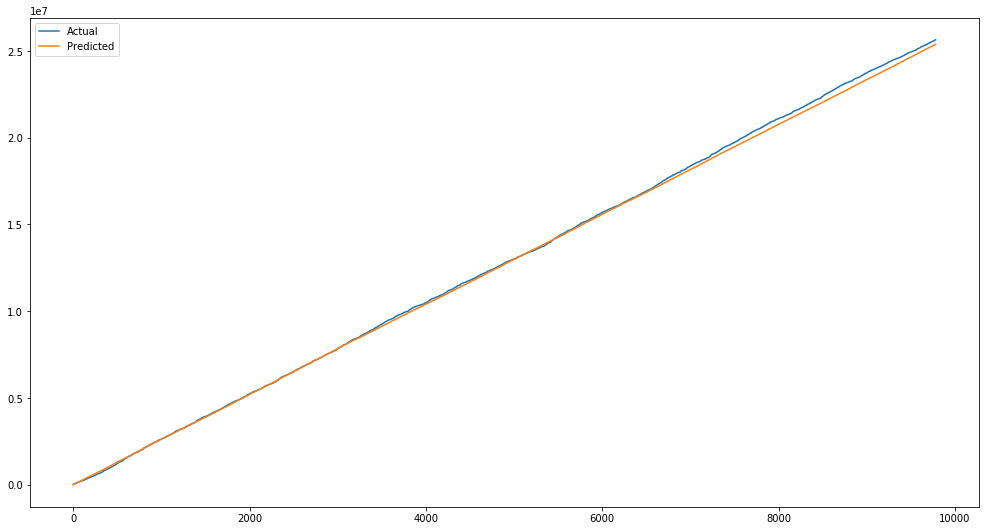

In [37]:
# 6.8 Lasso Regressor
lasso = Lasso()
lasso.fit(X_train,y_train)
las_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, las_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, las_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, las_pred))) 
a1 = y_test.ravel()
b1 = rf_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

In [73]:
#To Summarize
abc=[]
Regressors=['Linear Regression','SVR','Decision Tree','KNN','Random Forest','Ridge','Bayesian Ridge','Lasso']
models=[LinearRegression(),SVR(kernel = 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),RandomForestRegressor(random_state=0,n_estimators=100),Ridge(),BayesianRidge(),Lasso()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    abc.append(metrics.mean_absolute_error(y_test,y_pred))
models_dataframe=pd.DataFrame(abc,index=Regressors)   
models_dataframe.columns=['MAE']
models_dataframe

C:\Users\rajku\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,MAE
Linear Regression,2023.947952
SVR,1687.341576
Decision Tree,2671.846162
KNN,2002.213186
Random Forest,2023.218728
Ridge,1977.544771
Bayesian Ridge,1946.480348
Lasso,1910.321516


In [75]:
var=[]
Regressors=['Linear Regression','SVR','Decision Tree','KNN','Random Forest','Ridge','Bayesian Ridge','Lasso']
models=[LinearRegression(),SVR(kernel = 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),RandomForestRegressor(random_state=0,n_estimators=100),Ridge(),BayesianRidge(),Lasso()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    var.append(metrics.r2_score(y_test,y_pred))
models_dataframe=pd.DataFrame(var,index=Regressors)   
models_dataframe.columns=['variance']
models_dataframe

C:\Users\rajku\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,variance
Linear Regression,-10.701482
SVR,-0.126871
Decision Tree,-0.972067
KNN,-0.028115
Random Forest,0.039595
Ridge,-3.725126
Bayesian Ridge,0.051852
Lasso,0.063496


In [39]:
#7. Determining threshold for determining if an article is popular or not , Binary class problem.

df2 = dataset

output = []
df2.loc[df2[' shares']>1400, output.append] = 1
df2.loc[df2[' shares']<=1400 ,output.append]= 0

df2.rename(columns= {'nan':'output'},inplace=True)

yc = df2.iloc[:,61].values

df2 = df2.drop(" shares", axis=1)

df2 = df2.drop("url",axis =1)

df2 = df2.drop(" timedelta",axis = 1)

Xt =df2.iloc[:, 0:58].values

yt = df2.iloc[:,58].values

In [34]:
df2.isnull().sum()

 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

In [40]:

Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.25,random_state=0)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of Logistic Regression is 0.6011502371102815
Precision: 0.599594868332208
Recall: 0.5506407606448945
Fscore: 0.5740760693890744


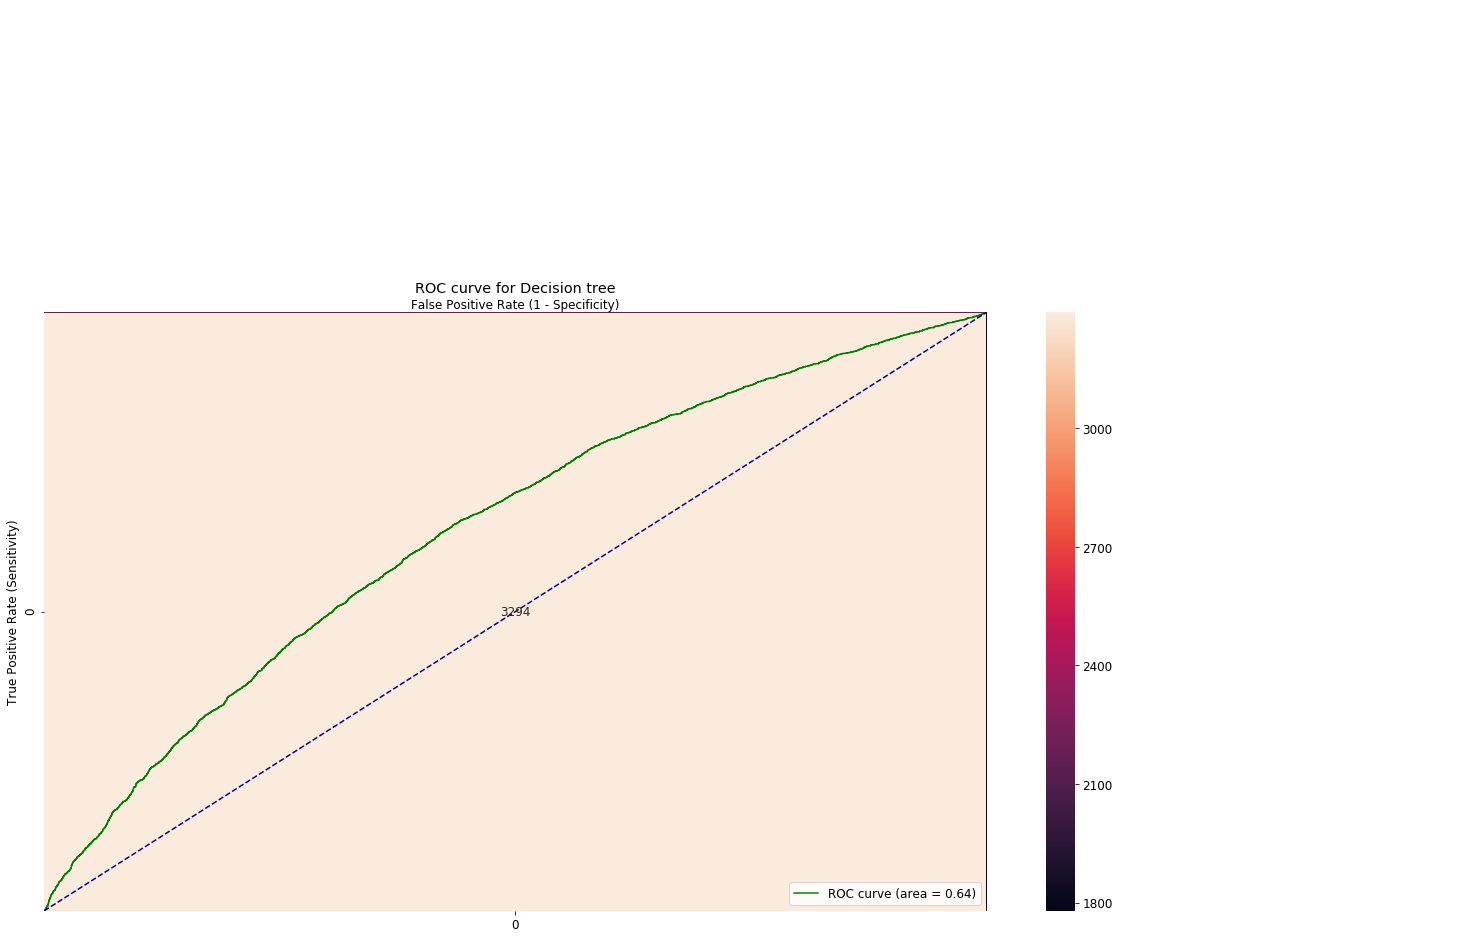

In [59]:
#models for Classification

# Logistic Regression

logreg = LogisticRegression(random_state=0)

logreg.fit(Xt_train,yt_train)

yt_pred = logreg.predict(Xt_test)

# Confusion matrix, Recall and precision values for logistic regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_test,yt_pred)
cnf_matrix = metrics.confusion_matrix(yt_test, yt_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True  ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy of Logistic Regression is',metrics.accuracy_score(yt_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, yt_pred))
print("Recall:",metrics.recall_score(yt_test, yt_pred))
print("Fscore:",metrics.f1_score(yt_test,yt_pred))
yt_pred_proba = logreg.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)
auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Decision tree')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy  0.6011502371102815
Precision: 0.599594868332208
Recall: 0.5506407606448945
Fscore: 0.5740760693890744


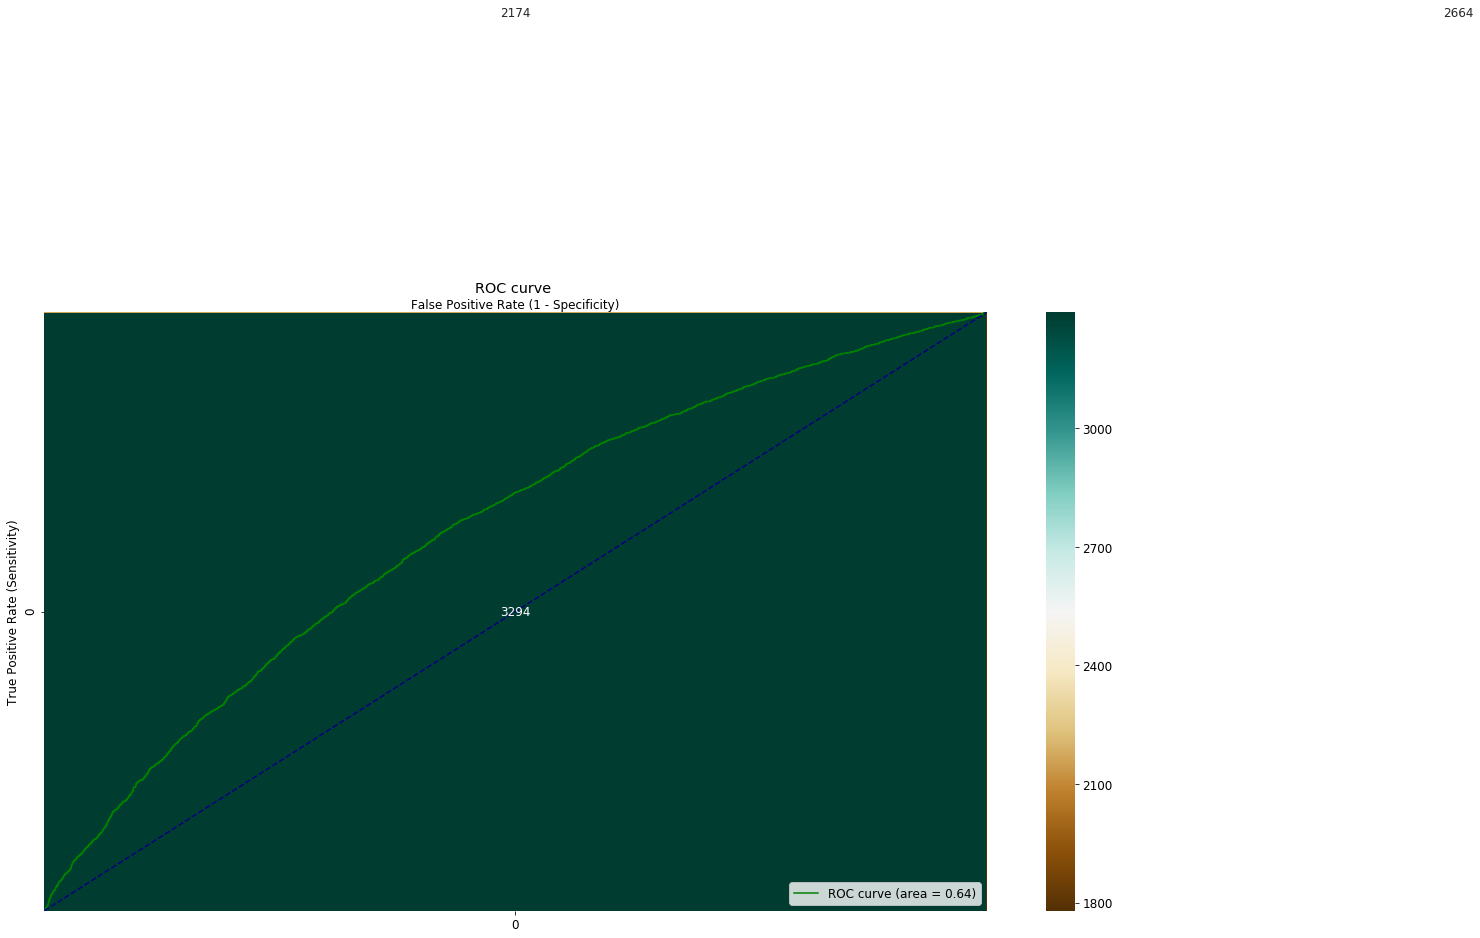

The accuracy  0.5719907173847241
Precision: 0.5628161888701517
Recall: 0.5518809425382389
Fscore: 0.5572949279899811


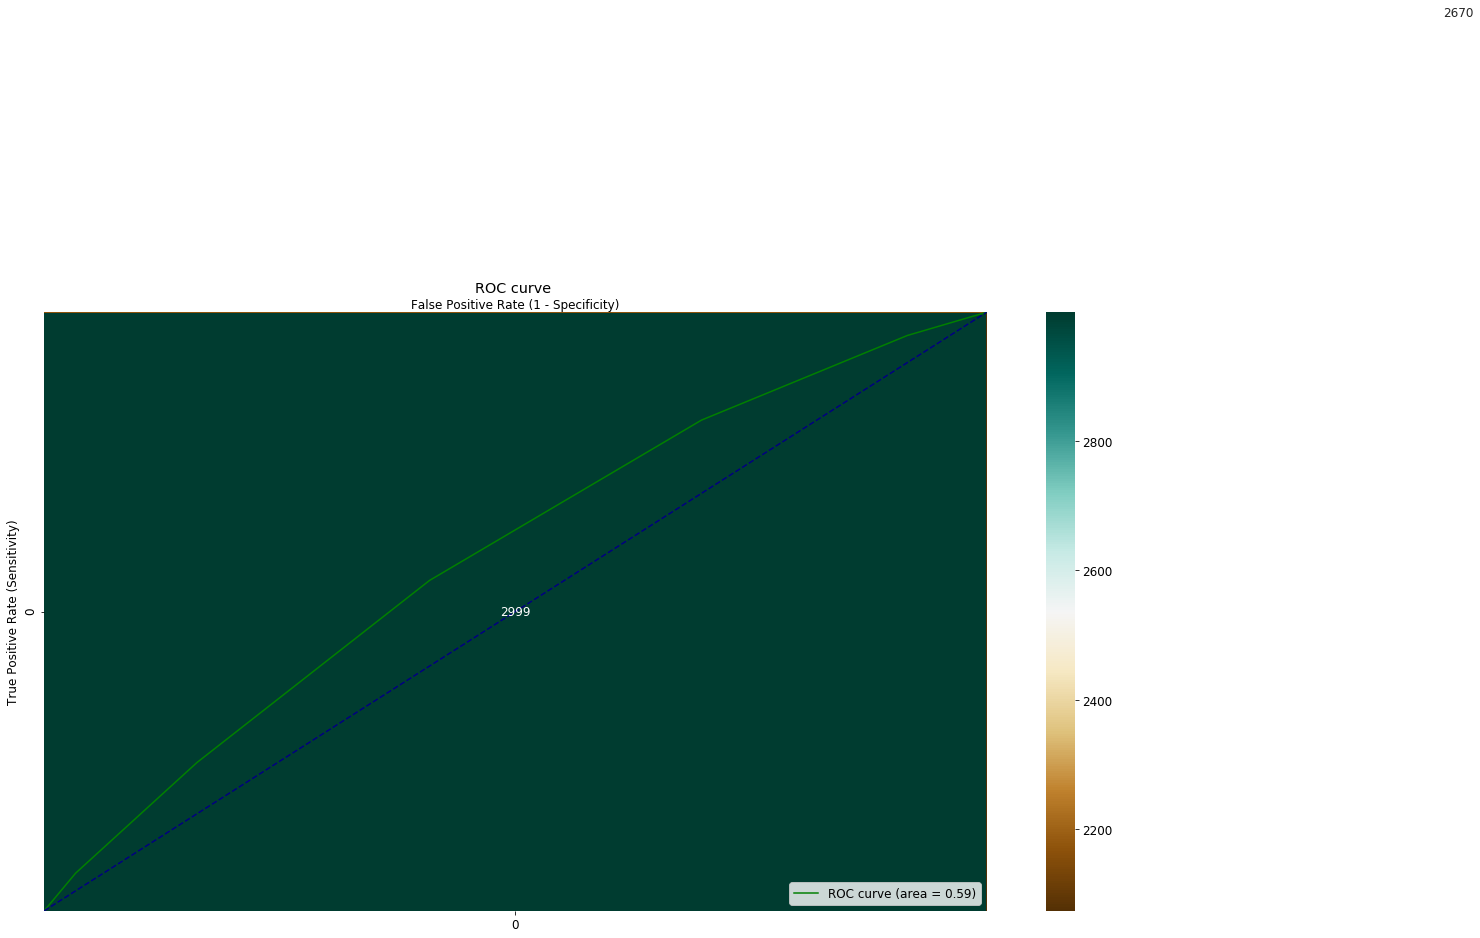

The accuracy  0.569670063565735
Precision: 0.5588900308324769
Recall: 0.5620090946672178
Fscore: 0.560445223126868


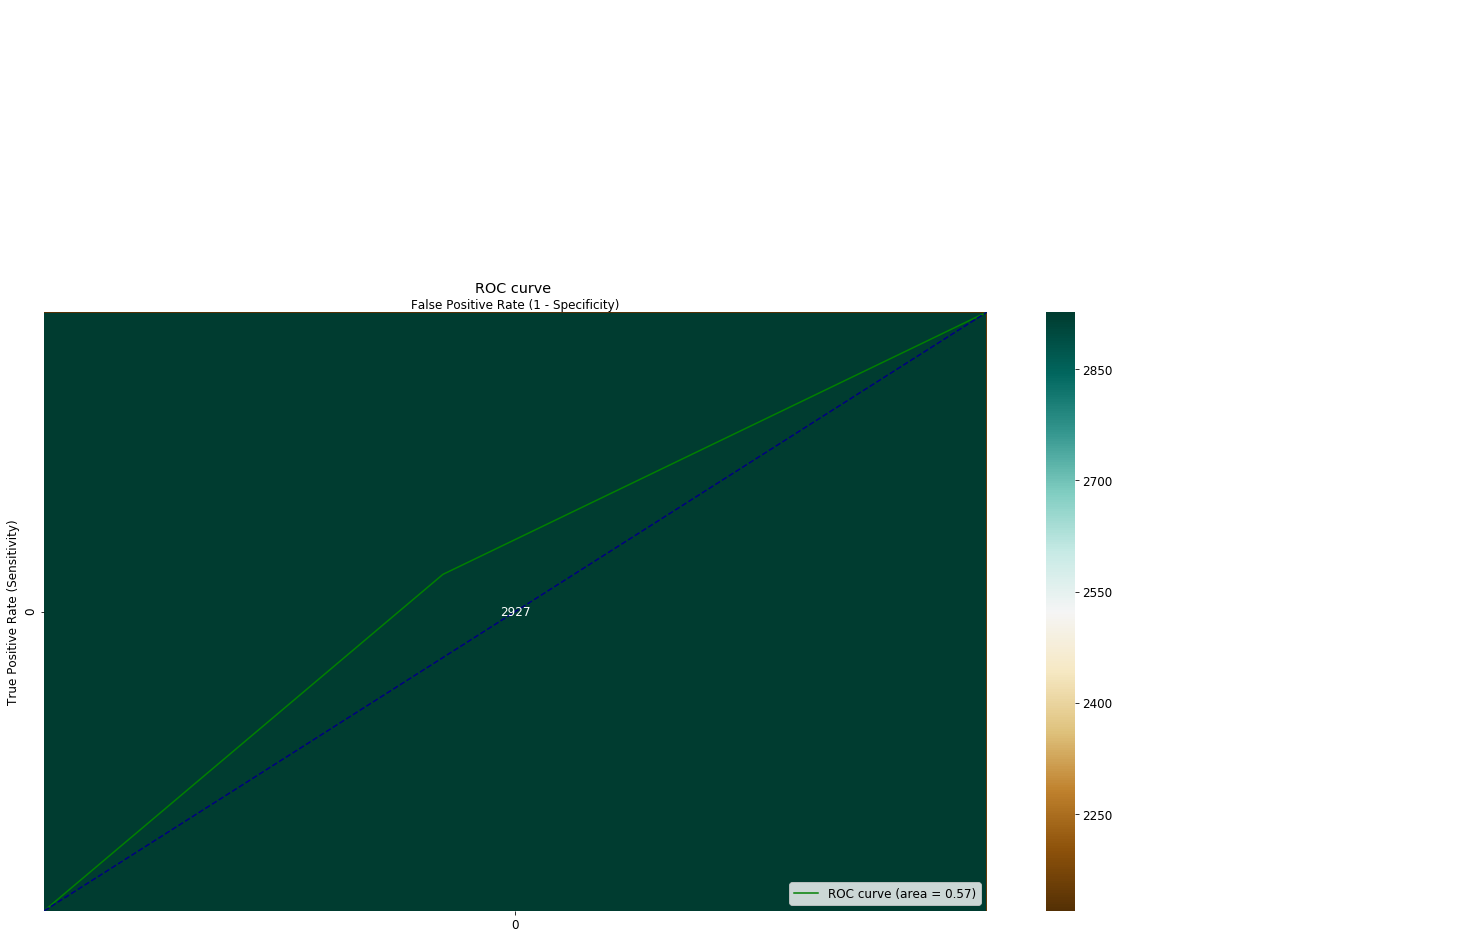

The accuracy  0.5528200988800323
Precision: 0.6510416666666666
Recall: 0.1808598594460521
Fscore: 0.283079909414429


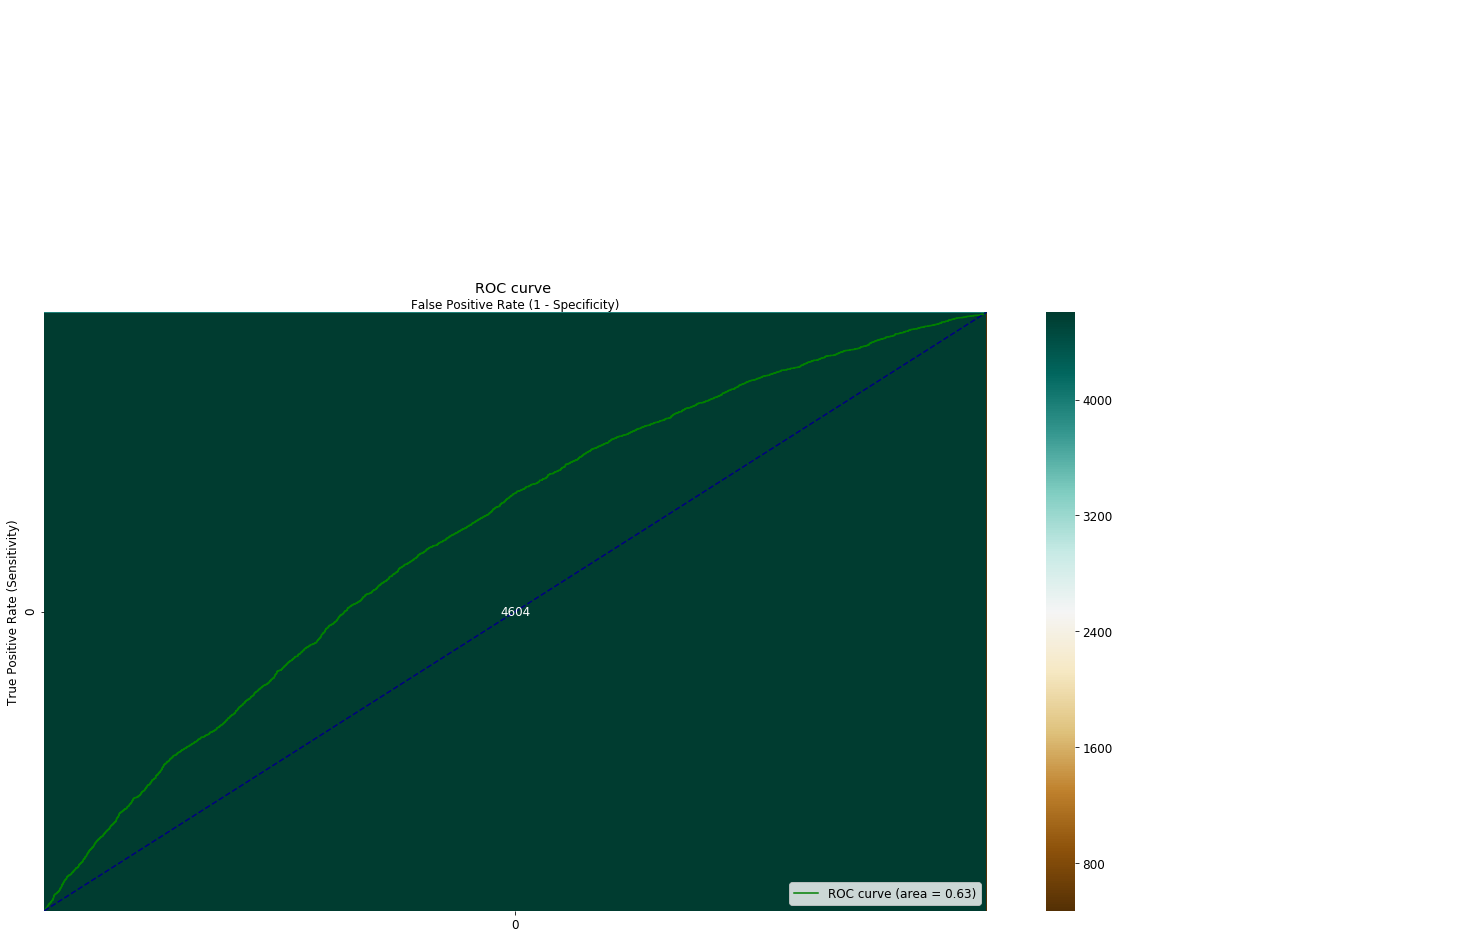

,Accuracy
Logistic Regression,0.601150
KNN,0.571991
Decision Tree,0.569670
Naive Bayes,0.552820


In [60]:
#All classifier model accuracies
abc=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),GaussianNB()]
for i in models:
    model = i
    model.fit(Xt_train,yt_train)
    yt_pred=model.predict(Xt_test)
    abc.append(metrics.accuracy_score(yt_pred,yt_test))
    cnf_matrix = metrics.confusion_matrix(yt_test, yt_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('The accuracy ',metrics.accuracy_score(yt_pred,yt_test))
    print("Precision:",metrics.precision_score(yt_test, yt_pred))
    print("Recall:",metrics.recall_score(yt_test, yt_pred))
    print("Fscore:",metrics.f1_score(yt_test,yt_pred))
    yt_pred_proba = model.predict_proba(Xt_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)

    auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
    plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12         
    plt.title('ROC curve ')        
    plt.xlabel('False Positive Rate (1 - Specificity)')        
    plt.ylabel('True Positive Rate (Sensitivity)')        
    plt.legend(loc="lower right")        
    plt.show() 
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

The accuracy of Random Forest Classifier is 0.6593683785692664
[[3409 1664]
 [1712 3126]]
The accuracy  0.5528200988800323
Precision: 0.6510416666666666
Recall: 0.1808598594460521
Fscore: 0.283079909414429


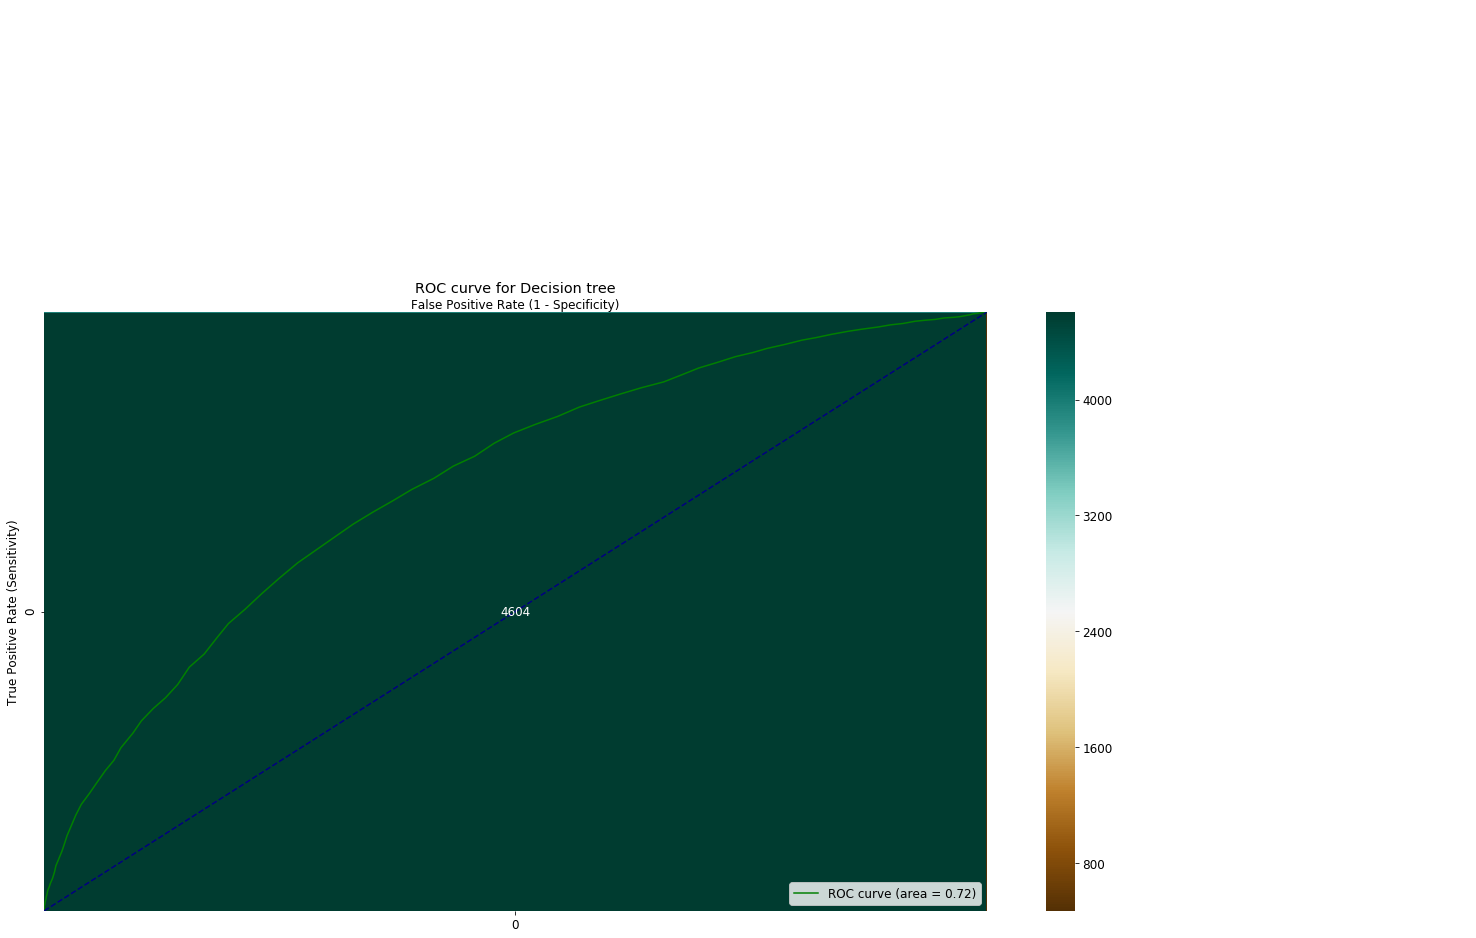

In [61]:
#Random Forest 

rf = RandomForestClassifier(n_estimators=100,random_state=0)

rf.fit(Xt_train,yt_train)
rf_pred = rf.predict(Xt_test)

# Confusion matrix, Recall and precision values for logistic regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_test,rf_pred)
print('The accuracy of Random Forest Classifier is',metrics.accuracy_score(rf_pred,yt_test))
print(cm)

cnf_matrix = metrics.confusion_matrix(yt_test, yt_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BrBG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy ',metrics.accuracy_score(yt_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, yt_pred))
print("Recall:",metrics.recall_score(yt_test, yt_pred))
print("Fscore:",metrics.f1_score(yt_test,yt_pred))
yt_pred_proba = rf.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)

auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Decision tree')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [54]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts

In [64]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, Xt, yt, cv=10)
print("Accuracy for 10 reputaions: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy for 10 reputaions: 0.64 (+/- 0.10)
